In [1]:
import pandas as pd
import datatable as dt
import numpy as np
import seaborn as sns

# DataTable -- jay 格式文件操作

- Path: digix/dataset/traindata/user_features_data/user_features_data.csv
- jay相关
>- 读取操作: dt.fread(".jay | .csv")
>- 转换为Dataframe: data.to_pandas()
>- 存为csv: data.to_csv()
>- 存为jay: data.to_jay()

- pandas读取时间测试

In [2]:
%%time
user_data = pd.read_csv("../../dataset/traindata/user_features_data/user_features_data.csv")
print("Train size:", user_data.shape)

Train size: (5910800, 1)
CPU times: user 2.09 s, sys: 183 ms, total: 2.28 s
Wall time: 2.28 s


- datatable读取时间测试

In [3]:
%%time
data = dt.fread("../../dataset/traindata/user_features_data/user_features_data.csv")
print("Train size:", data.shape)

Train size: (5910800, 8)
CPU times: user 1.25 s, sys: 85.2 ms, total: 1.34 s
Wall time: 125 ms


In [4]:
data.nunique()

<Frame#7fe1cd30f390 1x8>

In [5]:
data.nmodal()

<Frame#7fe1cd30f450 1x8>

In [6]:
data.sd()

<Frame#7fe1cd30f4e0 1x8>

In [7]:
pd_df = data.to_pandas()

In [8]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910800 entries, 0 to 5910799
Data columns (total 8 columns):
 #   Column       Dtype
---  ------       -----
 0   user_id      int32
 1   age          int32
 2   gender       int32
 3   country      int32
 4   province     int32
 5   city         int32
 6   city_level   int32
 7   device_name  int32
dtypes: int32(8)
memory usage: 180.4 MB


In [43]:
pd_df.isnull().sum(axis=0)

user_id        0
age            0
gender         0
country        0
province       0
city           0
city_level     0
device_name    0
dtype: int64

# Missingno 可视化库操作

In [13]:
import missingno as msno

In [11]:
%matplotlib inline

## matrix
>- 对数据的疏密程度可视化

In [14]:
msno.matrix(pd_df)

NameError: name 'pd_df' is not defined

## Chart
>- 展示列空的情况

<AxesSubplot:>

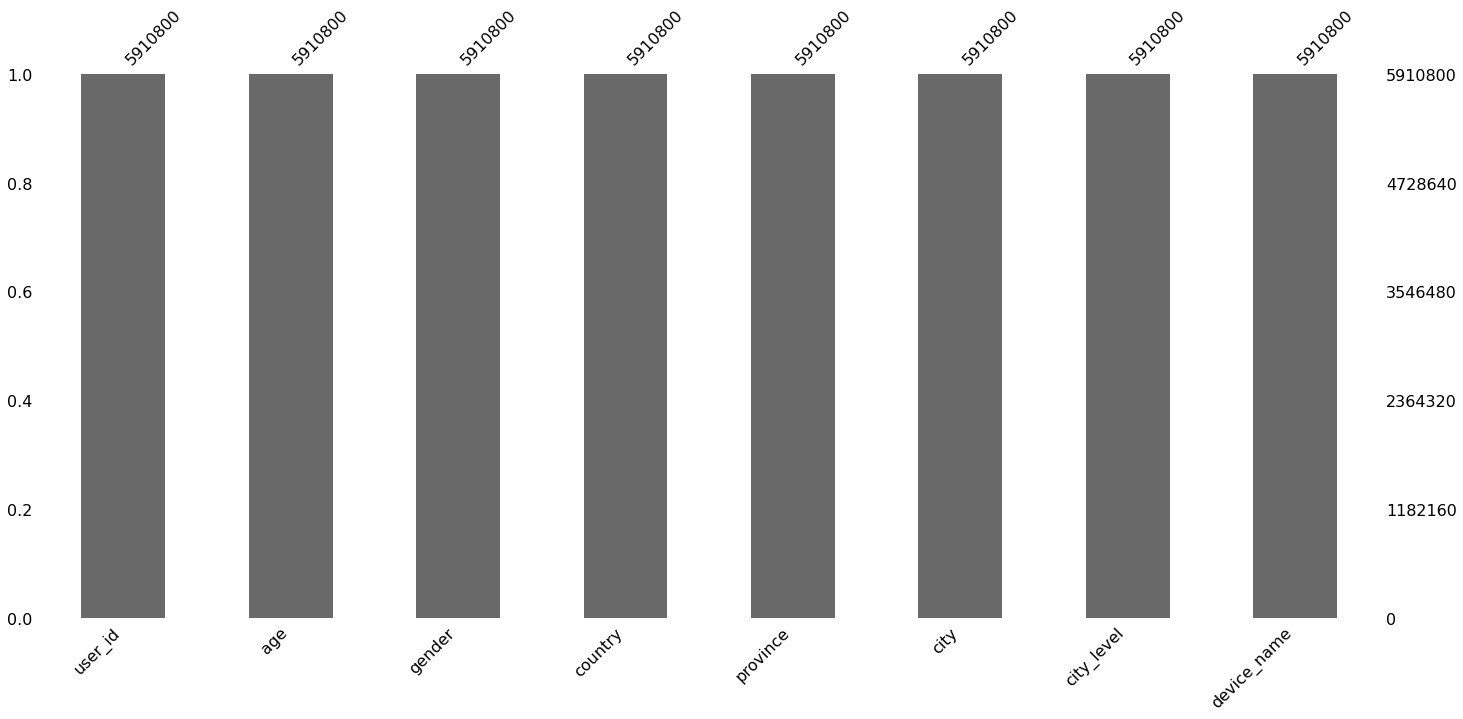

In [18]:
msno.bar(pd_df)

## Heatmap
>- 展示特征之间的相关性

/home/anaconda/envs/digix/lib/python3.6/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/anaconda/envs/digix/lib/python3.6/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

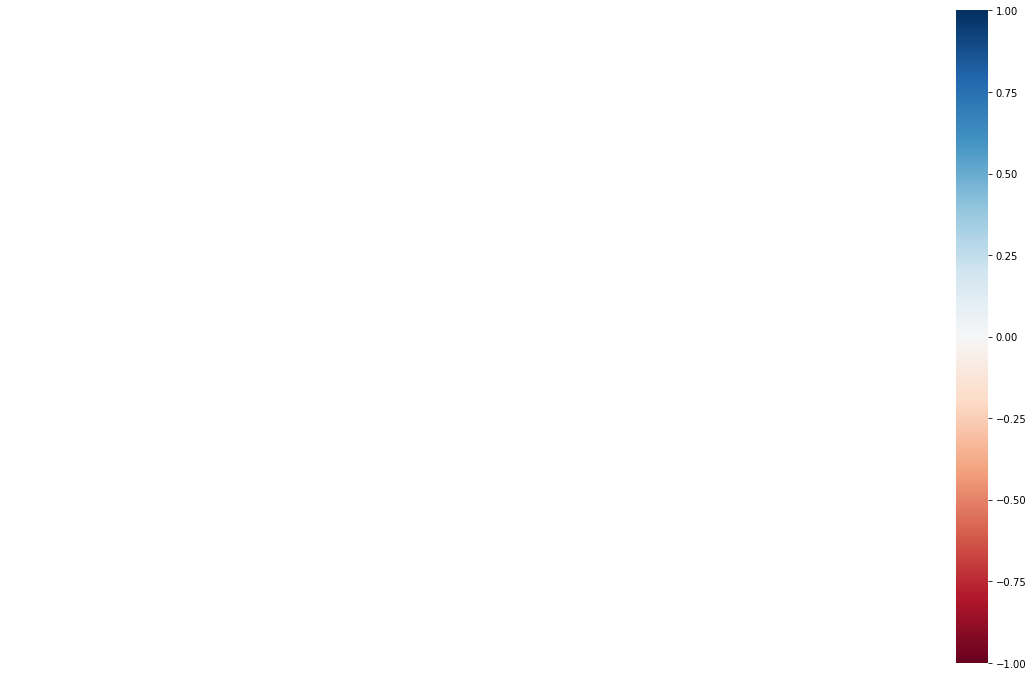

In [19]:
msno.heatmap(pd_df)

## 树状图
>- 相对于热力图，更深层次的展示特征之间的关系。

/home/anaconda/envs/digix/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:2833: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

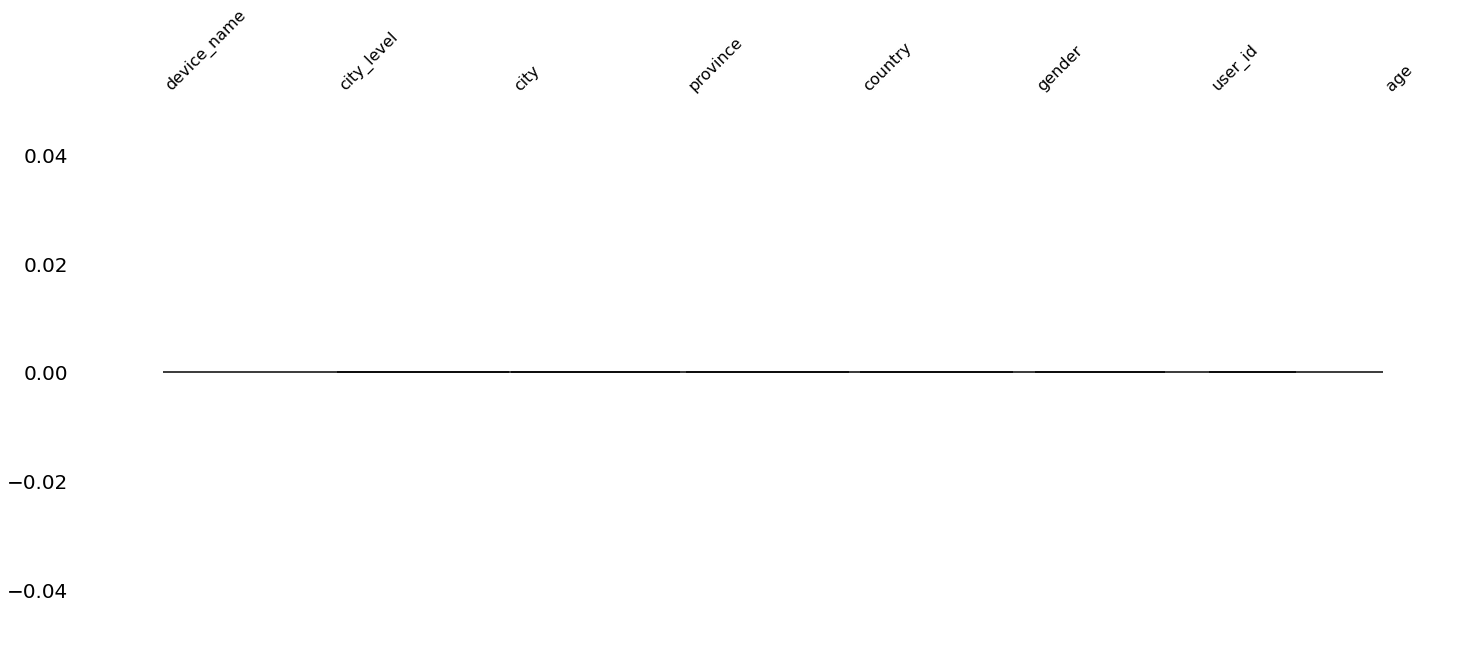

In [23]:
msno.dendrogram(pd_df)

---

# 数据实战分析

## 用户数据分析

In [2]:
%%time
user_data = dt.fread("../../dataset/traindata/user_features_data/user_features_data.csv")
# 将user_data从datatable转为dataframe
user_df = user_data.to_pandas()
print(user_data.shape)

(5910800, 8)
CPU times: user 1.43 s, sys: 107 ms, total: 1.54 s
Wall time: 166 ms


In [116]:
user_df.info(), user_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910800 entries, 0 to 5910799
Data columns (total 8 columns):
 #   Column       Dtype
---  ------       -----
 0   user_id      int32
 1   age          int32
 2   gender       int32
 3   country      int32
 4   province     int32
 5   city         int32
 6   city_level   int32
 7   device_name  int32
dtypes: int32(8)
memory usage: 180.4 MB


(None,
    user_id  age  gender  country  province  city  city_level  device_name
 0  1757005    3       1        0         9     6           3          327
 1    17938    0       0        0         4    22           3          327
 2  4263520    1       0        0        19     1           5          327
 3  1411600    3       0        0         5   138           1          327
 4  3992242    2       0        0         0   142           0          327)

从上面可以看出，用户特征中没有空缺或空值。

### 全局分析


- 字段nunique观测
> 通过nunique的观测，我们可以知道每个字段中不同的个数。就可以直接对nunique为1的字段直接删除，因为这些字段是没有任何信息的。

In [117]:
user_df.nunique()

user_id        5910800
age                  8
gender               4
country              3
province            33
city               339
city_level           8
device_name       1826
dtype: int64

性别分类有4个，国家特征有3个字段，统计一下国家特征各字段数量，差异特别大则剔除。

In [119]:
user_df['country'].value_counts()

0    5905701
1       4974
2        125
Name: country, dtype: int64

表中共计3种国家，且分布十分不均匀，考虑提出国家特征。

### 单变量分析
> 本数据都为数字类型数据。

In [125]:
import seaborn as sns
import pandas  as pd
import numpy   as np
import matplotlib.pyplot  as plt
plt.Figure(figsize=[10,6])
%matplotlib inline

user_data = dt.fread("../../dataset/traindata/user_features_data/user_features_data.csv")
# 将user_data从datatable转为dataframe
user_df = user_data.to_pandas()
del user_data
user_df.head(), user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910800 entries, 0 to 5910799
Data columns (total 8 columns):
 #   Column       Dtype
---  ------       -----
 0   user_id      int32
 1   age          int32
 2   gender       int32
 3   country      int32
 4   province     int32
 5   city         int32
 6   city_level   int32
 7   device_name  int32
dtypes: int32(8)
memory usage: 180.4 MB


(   user_id  age  gender  country  province  city  city_level  device_name
 0  1757005    3       1        0         9     6           3          327
 1    17938    0       0        0         4    22           3          327
 2  4263520    1       0        0        19     1           5          327
 3  1411600    3       0        0         5   138           1          327
 4  3992242    2       0        0         0   142           0          327,
 None)

#### 基于数值观察的数值型变量分析
> 数据解释中，user数据都为分类数据，下面试分析近似为数值类型的年龄段gender特征。

In [126]:
user_df['gender'].describe(percentiles = np.array(list(range(10))) * 0.1 )

count    5.910800e+06
mean     2.852506e-01
std      4.777792e-01
min      0.000000e+00
0%       0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
40%      0.000000e+00
50%      0.000000e+00
60%      0.000000e+00
70%      0.000000e+00
80%      1.000000e+00
90%      1.000000e+00
max      3.000000e+00
Name: gender, dtype: float64

嗯，gender特征无异常

#### 可视化分析其特征分布

In [151]:
# 设置查看数据分布的函数
def plotFigure(df, fname):
    plt.figure(figsize = [10,8])
    ax = plt.subplot(221)
    sns.countplot( x = fname, data = df)
    plt.xlabel(fname)

    plt.subplot(222 )
    df[fname].value_counts(normalize = True).plot(kind = 'bar') 
    plt.xlabel(fname)

- 查看用户数据中所有特征的分布

In [156]:
user_df.nunique()

user_id        5910800
age                  8
gender               4
country              3
province            33
city               339
city_level           8
device_name       1826
dtype: int64

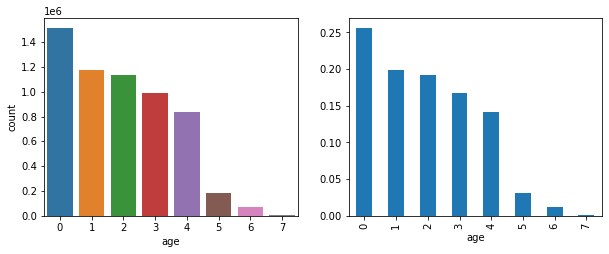

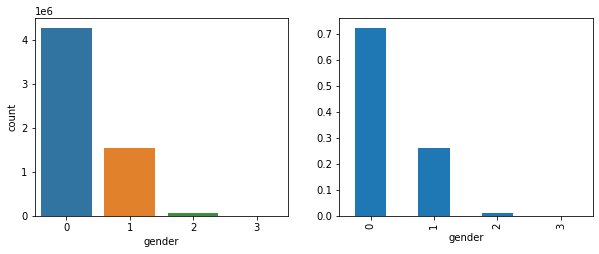

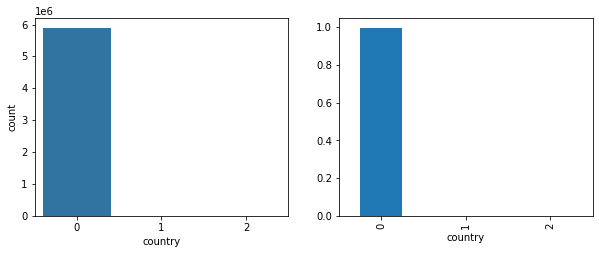

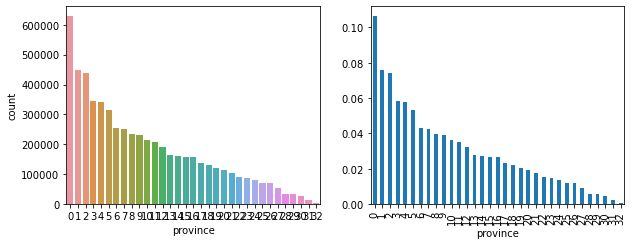

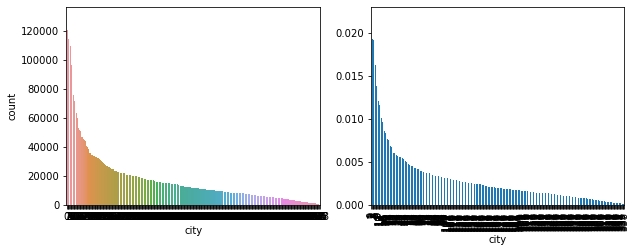

In [159]:
# devic太多，不考虑
for col_name in user_df.columns.values.tolist()[1:-2]:
    plotFigure(user_df, col_name)

country: 极度不均衡，可舍弃  
gender：相对不均衡，可考虑做特征变换，如log  
其他各数据：都是随着分类id增大，样本数量减少，这是否隐含着什么样的信息。



#### 查看其特征之间的相关性

In [4]:
%matplotlib inline

In [6]:
user_df.corr()

user_id       age    gender   country  province      city  \
user_id      1.000000  0.000240 -0.000149  0.000862 -0.000119  0.000761   
age          0.000240  1.000000  0.092405  0.088298  0.083970  0.004194   
gender      -0.000149  0.092405  1.000000  0.154157  0.080784 -0.023991   
country      0.000862  0.088298  0.154157  1.000000  0.078803  0.064332   
province    -0.000119  0.083970  0.080784  0.078803  1.000000  0.271449   
city         0.000761  0.004194 -0.023991  0.064332  0.271449  1.000000   
city_level  -0.000265  0.063136  0.082183  0.080792  0.259382 -0.078418   
device_name -0.000089  0.036249  0.014318  0.049673  0.029804 -0.013477   

             city_level  device_name  
user_id       -0.000265    -0.000089  
age            0.063136     0.036249  
gender         0.082183     0.014318  
country        0.080792     0.049673  
province       0.259382     0.029804  
city          -0.078418    -0.013477  
city_level     1.000000     0.043073  
device_name    0.043073     1.000000

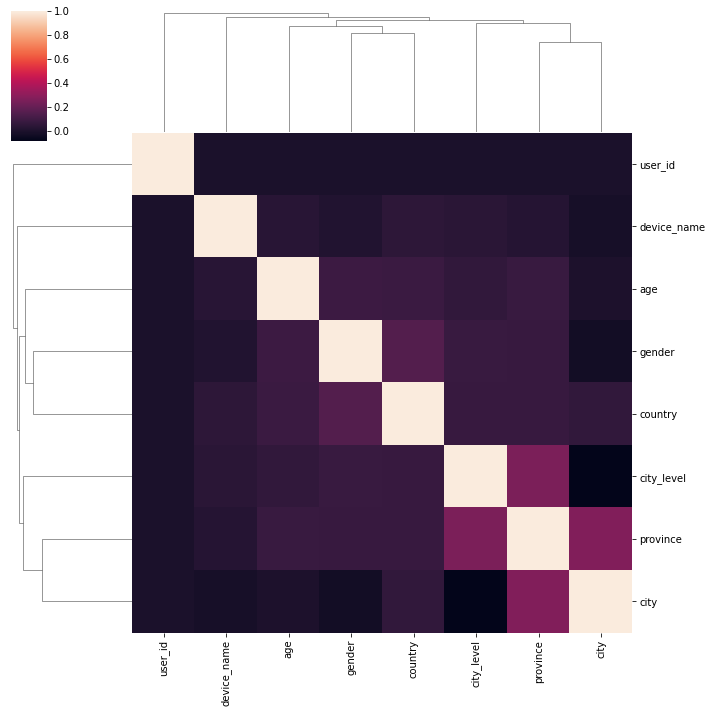

In [8]:
# 各特征之间的分层相关性热力图
sns.clustermap(user_df.corr())

从图中可以看出：
- city和province相关性很高
- province和city_level相关性很高
- city与city_level相关性不高
- gender和country有一定关系

#### 数据分析报告

In [3]:
# 一键数据分析
import pandas_profiling

pandas_profiling.ProfileReport(user_df)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- age为有序类别变量
- country、province、city、city_level、device_level都呈现长尾效应


## 视频数据分析

- 读取视频数据

In [2]:
%%time
# 读取为datatable
video_data = dt.fread("../../dataset/traindata/video_features_data/video_features_data.csv")

# 转换为dataframe
video_df = video_data.to_pandas()
print(video_df.shape)

(50355, 10)
CPU times: user 940 ms, sys: 60.3 ms, total: 1e+03 ms
Wall time: 153 ms


In [3]:
video_df.head()

video_id video_name                   video_tags  \
0      3460       脱皮爸爸                 院线电影,家庭关系,命运   
1     14553    喜气洋洋小金莲  古装喜剧,剧情片,喜剧片,内地电影,欢乐喜剧,爱情纠纷   
2      1214       风流家族            男女关系,家庭关系,命运,院线电影   
3     30639     大提琴的故事                       短片,动画片   
4     38522    歌舞大王齐格飞                喜剧片,人物传记,浪漫爱情   

                                   video_description video_release_date  \
0  中年失意的儿子田力行（古天乐饰）在生活上遇到了重重危机：母亲病逝,工作不顺,妻子要求离婚。正...         2017-04-27   
1  故事始于西门庆为西门药业的“伟哥”产品寻找代言人，西门庆初见潘金莲，一时惊为天人，为成功抱得...         2015-12-30   
2  香世仁（钟镇涛 饰）是家财万贯的香港富豪，在满足了一切物质上的要求后，他将生活的重心放在了儿...         2002-03-07   
3  低音大提琴演奏家史密斯科夫正要去参加某贵族的沙龙，途中他被河边的美丽景色所吸引，驻足观看。兴...         1949-01-01   
4  罗伯特．Z．伦纳德导演的这部影片以百老汇最大的歌舞团——齐格菲歌舞团的创办人佛罗伦斯．齐格菲...         1936-04-08   

                 video_director_list  \
0                               司徒慧焯   
1                            杨珊珊,李亚玲   
2                            邱礼涛,杨漪珊   
3                         伊里·特恩卡,契诃夫   
4  罗伯特·Z·伦纳德,William Anthony McGuire   

                                    video_actor_list  video_score  \
0                                      吴镇宇,古天乐,春夏,蔡洁          7.4   
1                                 陈南飞,程隆妮,王闯,贾海涛,闫薇儿          5.6   
2  张家辉,卢巧音,钟镇涛,叶童,李蕙敏,张坚庭,袁洁莹,黄佩霞,齐芷瑶,刘以达,叶伟信,邹凯光...          6.8   
3                                                             NaN   
4  威廉·鲍威尔,玛娜·洛伊,路易丝·赖纳,弗兰克·摩根,范妮·布莱斯,弗吉尼亚·布鲁斯,雷吉纳...          7.7   

  video_second_class  video_duration  
0           剧情,喜剧,奇幻            5913  
1                 喜剧            6217  
2        都市,喜剧,爱情,家庭            5963  
3              动画,爱情           17371  
4           剧情,歌舞,喜剧           10608

In [4]:
# 原始情况
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50355 entries, 0 to 50354
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             50355 non-null  int32  
 1   video_name           50355 non-null  object 
 2   video_tags           50355 non-null  object 
 3   video_description    50355 non-null  object 
 4   video_release_date   50355 non-null  object 
 5   video_director_list  50355 non-null  object 
 6   video_actor_list     50355 non-null  object 
 7   video_score          46994 non-null  float64
 8   video_second_class   50355 non-null  object 
 9   video_duration       50355 non-null  int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 3.5+ MB


In [5]:
# 替换其中的空字符串为NaN
video_df = video_df.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=False)

In [6]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50355 entries, 0 to 50354
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             50355 non-null  int32  
 1   video_name           50346 non-null  object 
 2   video_tags           42366 non-null  object 
 3   video_description    50158 non-null  object 
 4   video_release_date   49681 non-null  object 
 5   video_director_list  39217 non-null  object 
 6   video_actor_list     40035 non-null  object 
 7   video_score          46994 non-null  float64
 8   video_second_class   44364 non-null  object 
 9   video_duration       50355 non-null  int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 3.5+ MB


### 数据分析报告

In [7]:
# 一键数据分析
import pandas_profiling

pandas_profiling.ProfileReport(video_df)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 数据整体缺失情况观测

- 简单数值观测

In [9]:
video_df.isnull().sum(axis=0)

video_id                   0
video_name                 9
video_tags              7989
video_description        197
video_release_date       674
video_director_list    11138
video_actor_list       10320
video_score             3361
video_second_class      5991
video_duration             0
dtype: int64

除id以外，都有空值

In [11]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50355 entries, 0 to 50354
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             50355 non-null  int32  
 1   video_name           50346 non-null  object 
 2   video_tags           42366 non-null  object 
 3   video_description    50158 non-null  object 
 4   video_release_date   49681 non-null  object 
 5   video_director_list  39217 non-null  object 
 6   video_actor_list     40035 non-null  object 
 7   video_score          46994 non-null  float64
 8   video_second_class   44364 non-null  object 
 9   video_duration       50355 non-null  int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 3.5+ MB


- 查看数据疏密程度

<AxesSubplot:>

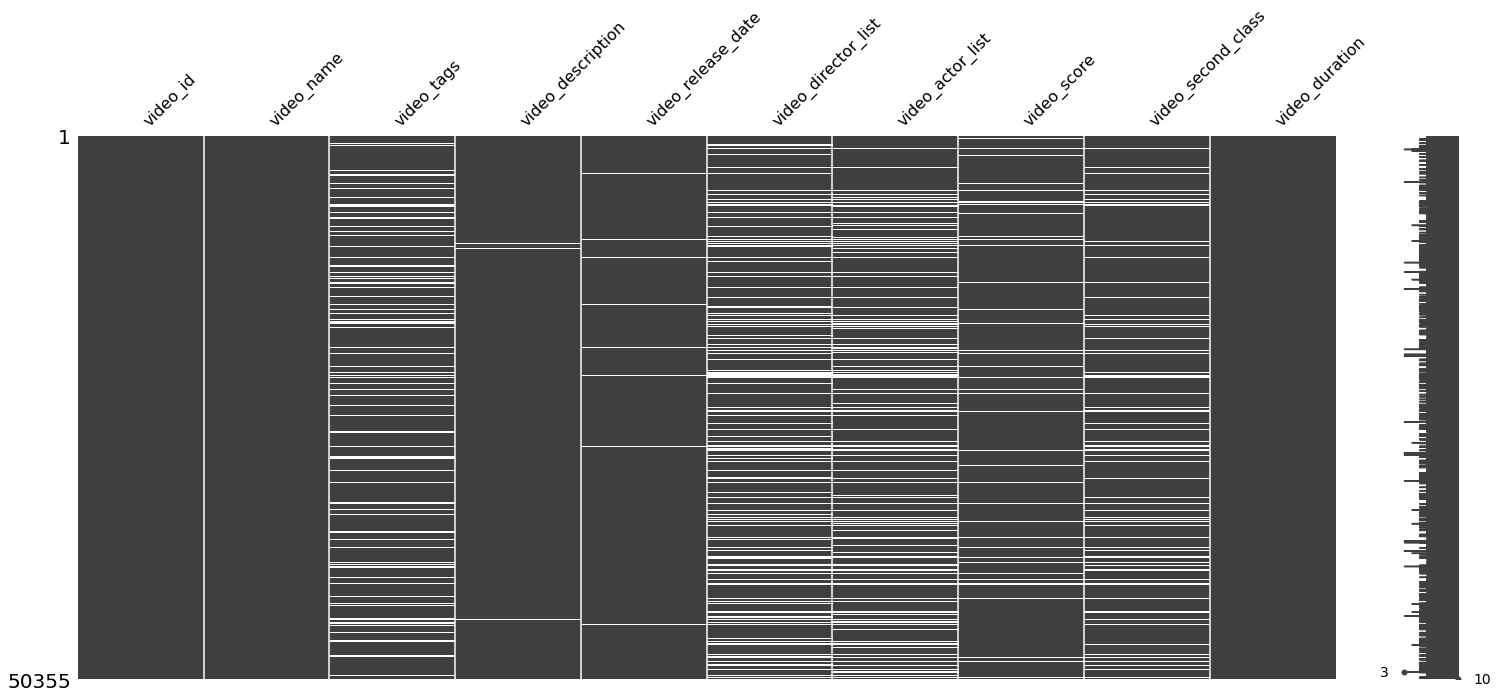

In [15]:
msno.matrix(video_df)

从上图可以看出，部分属性较为稀疏。
>- 稠密：video_id、video_name、video_description、video_release_date
>- 一般稠密： video_score、video_second_class
>- 稀疏：video_director_list、video_actor_list

- 计算每一类属性的缺失率

In [17]:
video_df.isnull().sum(axis=0) / len(video_df)

video_id               0.000000
video_name             0.000179
video_tags             0.158654
video_description      0.003912
video_release_date     0.013385
video_director_list    0.221190
video_actor_list       0.204945
video_score            0.066746
video_second_class     0.118975
video_duration         0.000000
dtype: float64

- 查看特征类别数、如果类别数特别少（例如为1）则可以丢弃特征。

In [18]:
video_df.nunique()

video_id               50355
video_name             42306
video_tags             23393
video_description      47329
video_release_date     11634
video_director_list    28204
video_actor_list       38529
video_score               49
video_second_class      6484
video_duration          6892
dtype: int64

- 查看整体缺失情况

<AxesSubplot:>

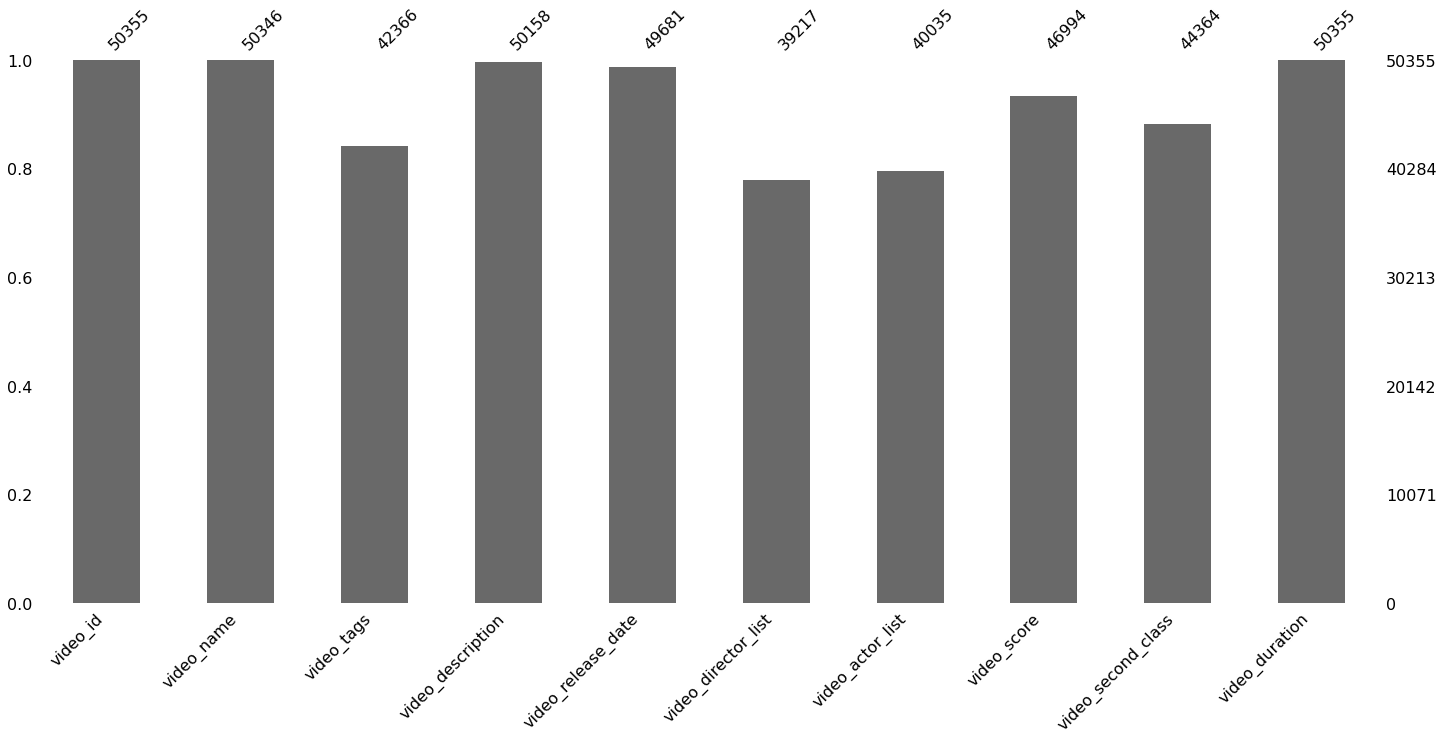

In [19]:
msno.bar(video_df) 

跟上面的结论一样，确实最严重的是导演、演员名单，其次是视频标签和二分类标签。